In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Activation, BatchNormalization


### LOADING DATASET

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

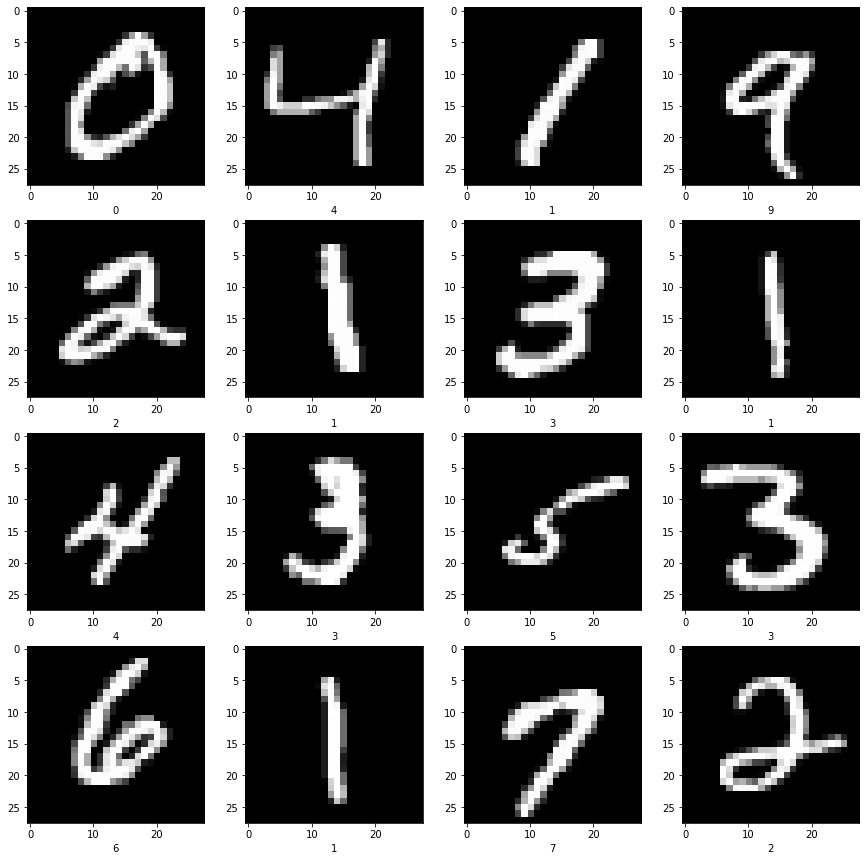

In [4]:
plt.figure(figsize=(15,15))
for i in range(1, 17):
    
    plt.subplot(4,4, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(str(Y_train[i]))
    # plt.xticks([])
    # plt.yticks([])

### DATA NORMALIZATION

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### CREATING A NEURAL NETWORK

In [9]:
model = Sequential([
    Dense(20, activation='sigmoid', input_shape=(784,)),
    Dense(50, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
h = model.fit(
    X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs = 20, verbose=2
)

Epoch 1/20
600/600 - 2s - loss: 1.6199 - accuracy: 0.5304 - val_loss: 0.9001 - val_accuracy: 0.7818 - 2s/epoch - 3ms/step
Epoch 2/20
600/600 - 1s - loss: 0.6847 - accuracy: 0.8165 - val_loss: 0.5441 - val_accuracy: 0.8575 - 844ms/epoch - 1ms/step
Epoch 3/20
600/600 - 1s - loss: 0.4600 - accuracy: 0.8807 - val_loss: 0.3899 - val_accuracy: 0.8970 - 730ms/epoch - 1ms/step
Epoch 4/20
600/600 - 1s - loss: 0.3390 - accuracy: 0.9118 - val_loss: 0.3050 - val_accuracy: 0.9194 - 732ms/epoch - 1ms/step
Epoch 5/20
600/600 - 1s - loss: 0.2744 - accuracy: 0.9288 - val_loss: 0.2626 - val_accuracy: 0.9289 - 784ms/epoch - 1ms/step
Epoch 6/20
600/600 - 1s - loss: 0.2367 - accuracy: 0.9374 - val_loss: 0.2355 - val_accuracy: 0.9357 - 775ms/epoch - 1ms/step
Epoch 7/20
600/600 - 1s - loss: 0.2124 - accuracy: 0.9437 - val_loss: 0.2157 - val_accuracy: 0.9415 - 711ms/epoch - 1ms/step
Epoch 8/20
600/600 - 1s - loss: 0.1938 - accuracy: 0.9474 - val_loss: 0.2030 - val_accuracy: 0.9444 - 736ms/epoch - 1ms/step
Epo

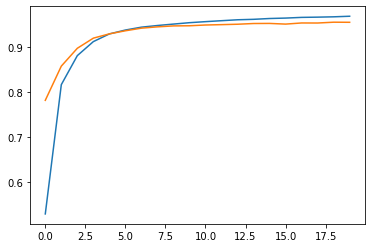

In [12]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

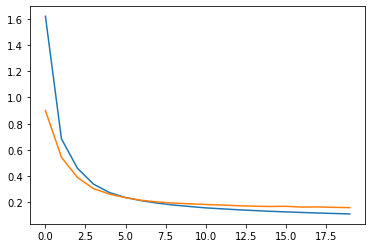

In [13]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

### SAVING MODEL

In [14]:
model.save('MNIST.h5')